<a href="https://colab.research.google.com/github/KarimeAylen/Hola/blob/main/EXAMEN/Copia_de_Transferencia_de_aprendizaje_binary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='navy'>**TRANSFERENCIA DE APRENDIZAJE (SEGUNDO PARCIAL => Primera Parte):** </font>
<font color='blue'> La entrega se realiza en los repositorios privados de cada alumno, dentro de la carpeta **PRÁCTICAS** y creando una subcarpeta en caso necesario, recuerde que deberán subirse todas las imágenes utilizadas en el reporte
## <font color='purple'>**¿Qué es TL(Transfer Learning)**</font>

### <font color='darkviolet'> **TIEMPO INVERTIDO EN UN DISEÑO PARA UNA PROBLEMA ESPECÍFICO**


*   <font color='blue'>¿Cúanto sería el tiempo que inviertes en diseñar una propuesta de IA que resuelva un problema en particular?
*   ¿Alguien más ya ha trabajado en una propuesta similar?
*   ¿Existen modelos entrenados para tareas similares? 

<font color='orange'>**Considera que existen equipos profesionales dedicados a optimizar código y librerías especializadas para competir con otros utilizando una base de datos como <font color='red'>IMAGENET <font color='orange'>mostrando la mejorar de exactitud, implementación o velocidad de sus modelos de visión por computadora con IA que funcionen realmente muy bien.**

<font color='blue'>**Entonces si tuvieramos que enfrentar el problema de identificar o clasificar diferentes clases de imágenes,  sería muy bueno que se pudiera transferir ese aprendizaje de los modelos desarrollados por expertos, a la solución de mi problema, a esto se le conoce como transferencia de aprendizaje y mejora el tiempo destinado al desarrollo de una propuesta propia desde cero con un porcentaje de exactitiud aceptable en poco tiempo, utilizando una arquitectura incluso de última generación.**

<br>

![Imaginet](https://www.image-net.org/static_files/index_files/logo.jpg)
es una base de datos de imágenes organizada según la jerarquía de WordNet (actualmente solo los sustantivos), en la que cada nodo de la jerarquía está representado por cientos y miles de imágenes. El proyecto ha sido fundamental en el avance de la visión por computadora y la investigación de aprendizaje profundo. Los datos están disponibles de forma gratuita para los investigadores para uso no comercial.

### <font color='purple'>**Veamos entonces TL utilizando un extractor de características**</font>
<font color='blue'>**El extractor de características independiente usa el modelo preentrenado, o una parte del modelo, para preprocesar imágenes y extraer características relevantes**

[Transfer Learning](https://keras.io/guides/transfer_learning/)


In [1]:
#Importar el modelo de interes
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
# from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout
import numpy as np
import matplotlib.pyplot as plt

BASE DE DATOS: https://drive.google.com/drive/folders/1_fjvIZBafWQHTmQk7SVsnIfTBBEEIRnN?usp=sharing

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Setup data inputs
from tensorflow.keras.preprocessing.image import ImageDataGenerator
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32  #Hiperparametros las letras mayusculas: lo puedes definir 

train_dir = "/content/drive/MyDrive/IC/IC-BASE/train"
test_dir = "/content/drive/MyDrive/IC/IC-BASE/test"

train_datagen = ImageDataGenerator(rescale=1/255.,
                                   rotation_range=40,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1/255.)

print("Training images:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=IMAGE_SIZE,
                                               batch_size=BATCH_SIZE,
                                               class_mode="categorical")



print("Testing images:")
test_data = test_datagen.flow_from_directory(test_dir,
                                              target_size=IMAGE_SIZE,
                                              batch_size=BATCH_SIZE,
                                              class_mode="categorical")

Training images:
Found 99 images belonging to 10 classes.
Testing images:
Found 100 images belonging to 10 classes.


In [4]:
imgs, labels = next(train_data)

[ImageDataGenerator](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator)

In [5]:
train_data

In [25]:
labels

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 

In [26]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')     
    plt.tight_layout()
    plt.show()

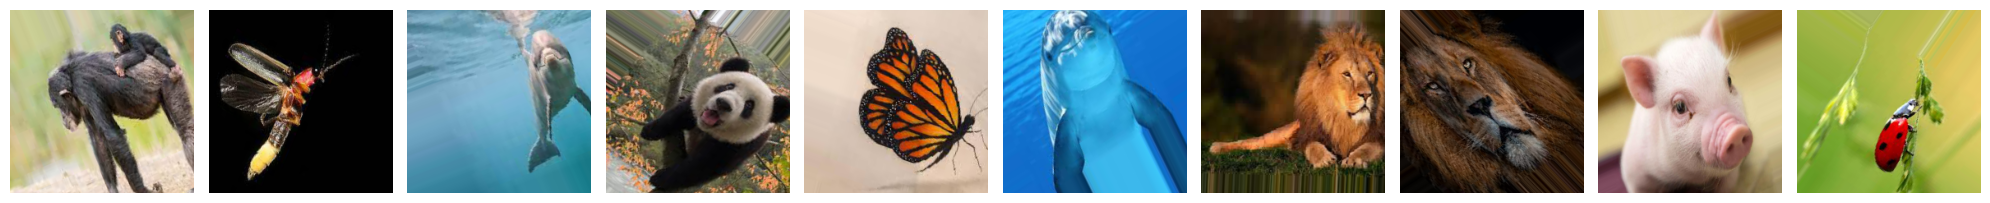

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0.

In [27]:
plotImages(imgs)
print(labels)

In [6]:
# Al cargar un modelo dado, el argumento " include_top " se puede establecer en False, en cuyo caso las capas de salida
# totalmente conectadas (DENSE) del modelo utilizado para hacer predicciones no se cargarán, esto permite agregar y entrenar
# una nueva capa de salida.                    
                                     #dimensiones profundidad de 3 canales rgv, peso imaginet, 
pre_trained_model = VGG16(input_shape=IMAGE_SIZE+(3,), weights='imagenet', include_top=False)

In [7]:
# Se debe CONGELAR el modelo base, es decir no se ajustarán los pesos del modelo base
pre_trained_model.trainable = False

In [8]:
IMAGE_SIZE+(3,)

(224, 224, 3)

### <font color='darkviolet'> **Modelos Funcionales de Keras**

La API funcional de Keras proporciona una forma más flexible de definir modelos, permitiendo definir múltiples modelos de entrada o salida, así como modelos que comparten capas. Los modelos se definen creando instancias de capas y conectándolas directamente entre sí en pares, luego definiendo un modelo que especifica las capas para que actúen como entrada y salida del modelo.



1.   **Definición de entrada:** A diferencia del modelo secuencial, se debe crear y definir una capa de entrada independiente que especifique la forma de los datos de entrada. La capa de entrada toma un argumento de forma que es una tupla que indica la dimensionalidad de los datos de entrada.
     ```
from keras.layers import Input
visible = Input(shape=(2,))
     ```
2.   **Conexión de capas:** Las capas en el modelo están conectadas por pares.Para realizarlo se  especifica de donde proviene la entrada al definir cada nueva capa. Se utiliza una notación de paréntesis, de modo que después de crear la capa, se especifica la capa de la que proviene la entrada a la capa actual.
     ```
from keras.layers import Input
from keras.layers import Dense
visible = Input(shape=(2,))
hidden = Dense(2)(visible)
     ```
3.   **Creando el modelo:**Después de crear todas las capas de su modelo y conectarlas, debe definir el modelo. Keras proporciona una clase de modelo que puede usar para crear un modelo a partir de sus capas creadas. Requiere que solo especifique las capas de entrada y salida
     ```
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
visible = Input(shape=(2,))
hidden = Dense(2)(visible)
model = Model(inputs=visible, outputs=hidden)
     ```
EJEMPLOS:

     **Perceptrón multicapa**
     ```
# Multilayer Perceptron
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
visible = Input(shape=(10,))
hidden1 = Dense(10, activation='relu')(visible)
hidden2 = Dense(20, activation='relu')(hidden1)
hidden3 = Dense(10, activation='relu')(hidden2)
output = Dense(1, activation='sigmoid')(hidden3)
model = Model(inputs=visible, outputs=output)
# summarize layers
print(model.summary())
     ```
     **Red neuronal convolucional**
     ```
# Convolutional Neural Network
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
visible = Input(shape=(64,64,1))
conv1 = Conv2D(32, kernel_size=4, activation='relu')(visible)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
conv2 = Conv2D(16, kernel_size=4, activation='relu')(pool1)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
flat = Flatten()(pool2)
hidden1 = Dense(10, activation='relu')(flat)
output = Dense(1, activation='sigmoid')(hidden1)
model = Model(inputs=visible, outputs=output)
# summarize layers
print(model.summary())
     ```

In [28]:
pre_trained_model.output

<KerasTensor: shape=(None, 7, 7, 512) dtype=float32 (created by layer 'block5_pool')>

In [29]:
pre_trained_model.input

<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_1')>

In [30]:
pre_trained_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

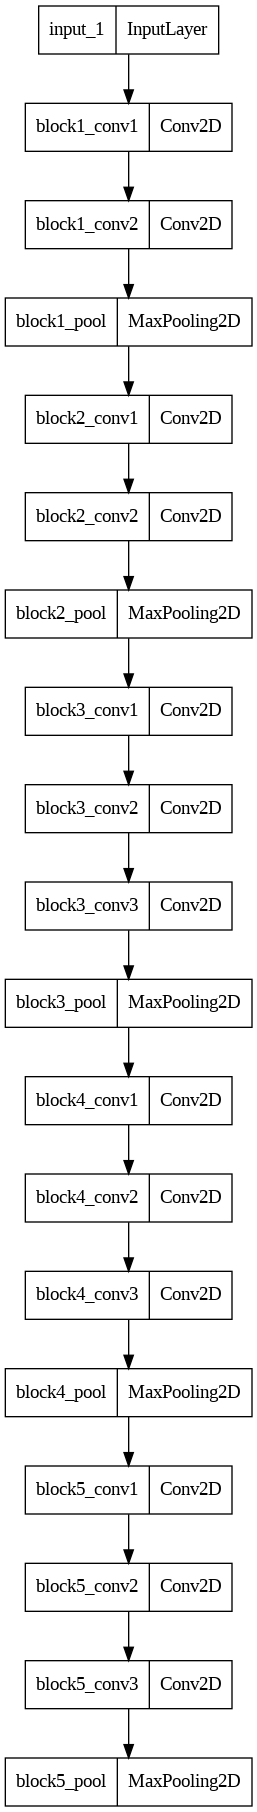

In [11]:
from keras.utils import plot_model
# ver el modelo gráficamente
plot_model(pre_trained_model)

In [12]:
# Agregar nuevas capas utlizando la API funcional de KERAS 
x = Flatten()(pre_trained_model.output)
x = Dense(70, activation='relu')(x)
#x = Dense(100,activation='sigmoid')(x)
x = Dense(110, activation='relu')(x)
x = Dense(150,activation='tanh')(x)
predicciones = Dense(10, activation='softmax')(x)

In [13]:
# Crear modelo
modelo = Model(inputs=pre_trained_model.input, outputs=predicciones)
modelo.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [14]:
# Compilar modelo
modelo.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [15]:
# Entrenar modelo
history = modelo.fit(train_data, validation_data=test_data, epochs=100, batch_size=100)


Epoch 1/100
4/4 [==============================] - 14s 3s/step - loss: 3.6629 - accuracy: 0.0909 - val_loss: 2.3028 - val_accuracy: 0.1100
Epoch 2/100
4/4 [==============================] - 3s 949ms/step - loss: 2.8006 - accuracy: 0.0808 - val_loss: 2.4039 - val_accuracy: 0.1300
Epoch 3/100
4/4 [==============================] - 2s 779ms/step - loss: 2.4243 - accuracy: 0.0707 - val_loss: 2.1970 - val_accuracy: 0.2500
Epoch 4/100
4/4 [==============================] - 2s 638ms/step - loss: 2.2628 - accuracy: 0.1313 - val_loss: 2.1741 - val_accuracy: 0.2000
Epoch 5/100
4/4 [==============================] - 2s 649ms/step - loss: 2.3244 - accuracy: 0.1717 - val_loss: 2.0459 - val_accuracy: 0.2700
Epoch 6/100
4/4 [==============================] - 3s 778ms/step - loss: 2.2200 - accuracy: 0.2020 - val_loss: 2.1705 - val_accuracy: 0.1900
Epoch 7/100
4/4 [==============================] - 3s 768ms/step - loss: 2.3197 - accuracy: 0.1111 - val_loss: 1.9916 - val_accuracy: 0.2600
Epoch 8/100
4/4

In [31]:
# Guardar el modelo en formato HDF5 
modelo.save('./dataset/model_da1.h5')

In [32]:
from tensorflow.keras.preprocessing import image
#img_path = '/content/drive/MyDrive/IC/dataset/dataset/test/luciernaga/luc07.jpg'
img_path = '/content/drive/MyDrive/IC/dataset/dataset/test/mariposa/mariposa10.jpg'

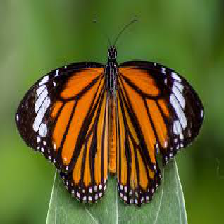

In [33]:
img = image.load_img(img_path, target_size=(224, 224))
img

In [34]:
X = image.img_to_array(img)
X = np.expand_dims(X, axis=0)

In [35]:
from tensorflow.keras.applications.vgg16 import preprocess_input
X = preprocess_input(X)
preds = modelo.predict(X)

1/1 [==============================] - 0s 20ms/step


In [36]:
preds.shape

(1, 10)

In [37]:
preds

array([[3.9484094e-06, 4.0459443e-05, 2.7193498e-06, 1.4489207e-06,
        2.4657962e-07, 1.2013424e-05, 7.7246958e-05, 1.8083869e-05,
        9.9975115e-01, 9.2771523e-05]], dtype=float32)

In [38]:
np.rint(preds)

array([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]], dtype=float32)

In [40]:
imgs, labels = next(test_data)

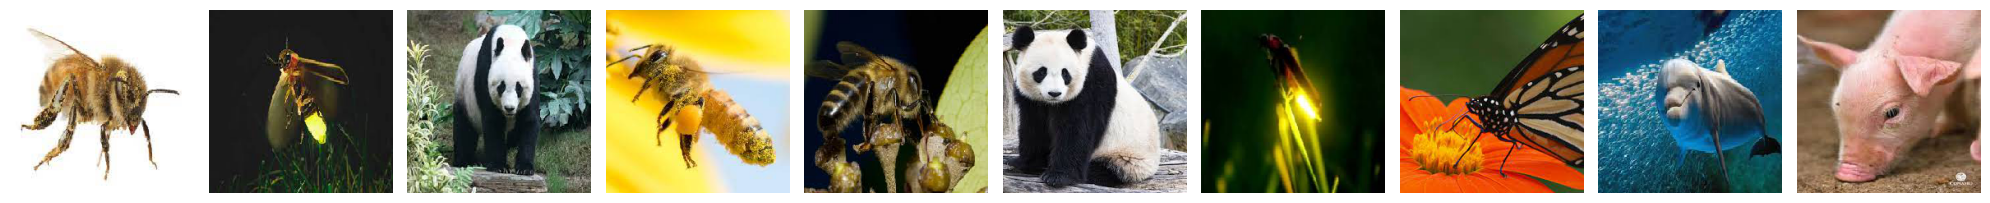

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0.

In [41]:
plotImages(imgs)
print(labels)

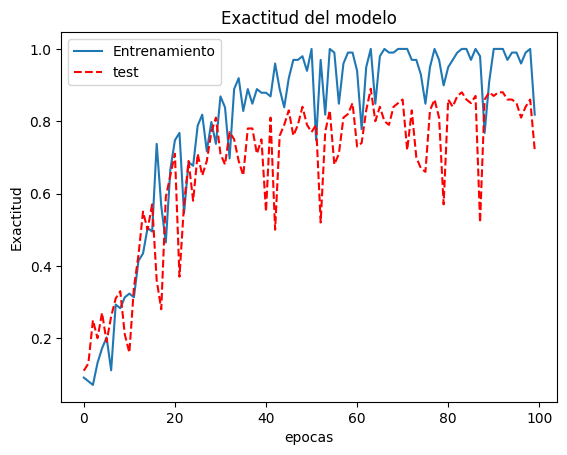

In [39]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'],'r--')
plt.title('Exactitud del modelo')
plt.ylabel('Exactitud')
plt.xlabel('epocas')
plt.legend(['Entrenamiento', 'test'], loc='upper left')
plt.show()

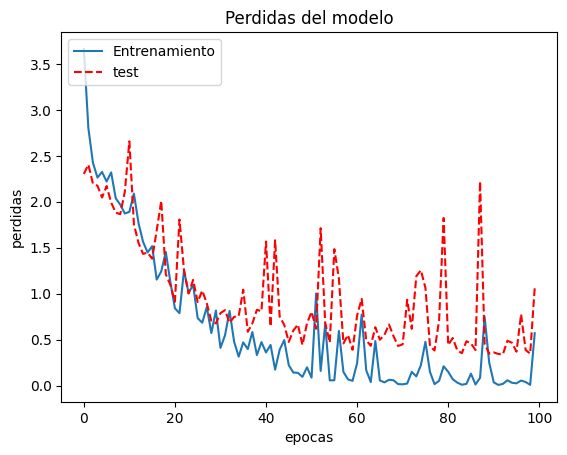

In [24]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'],'r--')
plt.title('Perdidas del modelo')
plt.ylabel('perdidas')
plt.xlabel('epocas')
plt.legend(['Entrenamiento', 'test'], loc='upper left')
plt.show()